<div style="background-color:black;color:white;padding:20px">

<center><h3> LAA </h3></center>
<center><h1> Projeto Bicóptero </h1></center>

<center> <h1> Procedimento de identificação dos parâmetros de inercia, atrito e caracterização de atuadores</h1></center>

<h3> Por Gabriel Henrique Costa e Silva </h3> 
</div>

<h2> Inicializando as bibliotecas </h2>

In [1]:
# para instalar o itikz
#pip install itikz
%load_ext itikz

In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from sympy import * 
from sympy import trigsimp, pi, cos, sin
from sympy.physics.mechanics import *
from scipy import signal
from scipy.integrate import odeint
from sympy import Pow

In [3]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [59]:
t = Symbol("t")

# Angulos Theta
theta1 = Function("theta1")(t)
theta2 = Function("theta2")(t)
theta3 = Function("theta3")(t)
theta4 = Function("theta4")(t)

# Constante da gravidade
g = symbols('g', real = True, constant = True)

# Forcas e Momentos
fx, fy, fz = dynamicsymbols('f_x, f_y, f_z')
taux, tauy, tauz = dynamicsymbols('tau_x, tau_y, tau_z')

# Forcas dos motores
f1,f2= dynamicsymbols('F_1, F_2')
f= dynamicsymbols('F')

# Angulos Alfa (Angulos do mecanismo tilt)
alpha1 = Function("alpha1")(t)
alpha2 = Function("alpha2")(t)

# Extensão dos bracos do bicopter
b = symbols('b',real = True, constant = True)

# Extensão dos segmentos do braço robótico
l1, l2, l3, l4 = symbols('l_1, l_2, l_3, l_4', real = True, constant = True)

#Características inerciais
m1, m2, m3, m4, mp = symbols('m_1, m_2, m_3, m_4, m_p',real = True, constant = True)
Ix1, Ix2, Ix3, Ix4, Ixp = symbols('Ix_1, Ix_2, Ix_3, Ix_4, Ix_p',real = True, constant = True)
Iy1, Iy2, Iy3, Iy4, Iyp = symbols('Iy_1, Iy_2, Iy_3, Iy_4, Iy_p',real = True, constant = True)
Iz1, Iz2, Iz3, Iz4, Izp = symbols('Iz_1, Iz_2, Iz_3, Iz_4, Iz_p',real = True, constant = True)
lg1, lg2, lg3, lg4 =symbols('l_{G_1}, l_{G_2}, l_{G_3}, l_{G_4}',real = True, constant = True)

# Ganho de atrito
fs1, fs2, fs3, fs4, fs5 = symbols('fs_1, fs_2, fs_3, fs_4, fs_5',real = True, constant = True)
e1, e2, e3, e4 = symbols('epsilon_1, epsilon_2, epsilon_3, epsilon_4',real = True, constant = True)


K, xi, wn =symbols('K, xi, omega_n',real = True, constant = True)


# Ganho
Kp, Kd = symbols('K_p, K_d',real = True, constant = True)

# Variaveis no estado de equilibrio

# simplificacoes
num1, num2, num3, num4 = symbols('num1, num2, num3, num4',real = True, constant = True)
I1, I2, I4 = symbols('I_1, I_2, I_4',real = True, constant = True)


<h2> Definindo as variaveis de Laplace </h2>

In [60]:
s = Symbol("s")

# Angulos Theta
Theta1 = Function("\Theta_1")(s)
Theta2 = Function("\Theta_2")(s)
Theta3 = Function("\Theta_3")(s)
Theta4 = Function("\Theta_4")(s)

# Força F
F = Function("F")(s)

# Funcao transformada de Laplace
def L(f):
    return laplace_transform(f, t, s, noconds=True);

<h2> Recuperando equações do movimento do modelo final </h2>

In [61]:
Eq=zeros(3,1)

%store -r Eq
Aprender como fazer isso seria muito mais facil

<h2> Massas, dimensões e propriedades de inércia do sistema </h2>

|  Elemento | $l_{i}$ [m]  |  $l_{G_i}$ [m]  |
| --- | --- | --- | 
| 1 | 0.3250 | 0.1414 |
| 2 | 0.5950 | 0.0000 | 
| 3 | 0.1730 | 0.0516 | 
| 4 | 0.0147 | 0.0000 | 
| P | 0.0000 | 0.0000 |

|  Elemento |  Massa [$kg$]  |  <td colspan=3> M. de Inércia [$kg.m^2$] |  |  |
| --- | --- | --- | --- | --- |
|  |  | Ixx | Iyy | Izz |
1  | 2,325   | 0,102  | 0,001 | 0,102 |
2  | 2,761 | 0,004  | 0,288  | 0,290 |
3  | 0,154 | 0,001 | 1,835e-5 | 0,001 |
4 | 0,115  | 1,723e-5 | 7,608e-5 | 8,260e-5 |
5 | 0,565 | 0,014 | 5,000e-4 | 0,013 |

\begin{align}
    \bar{I}_1 & = Iz_{1} + Iz_{2} + Iz_{3} + Iz_{4}+ Iz_{p} + l^{2}_{2} (m_{3} + m_{4}+ m_{p})\label{eq:I1}\\
    \bar{I}_2 & = Iy_{2} + Iy_{3} + Iy_{4} + Iy_{p} + l^{2}_{2} (m_{3} + m_{4}+m_{p}) + l^{2}_{G_3}m_{3} +  l^{2}_{3}m_{4} + (l_{3}+l_{4})^2 m_{p}\label{eq:I2}\\
    \bar{I}_4 & = Ix_{4}+Ix_{p}+l^{2}_{4} m_{p}\label{eq:I3}
\end{align}

In [62]:
valores_den={I1 : Iz1 + Iz2 + Iz3 + Iz4 + Izp + l2*l2*(m3+m4+mp), I2: Iy2 + Iy3 + Iy4 + Iyp + l2*l2*(m3+m4+mp) + lg3*lg3*m3 + l3*l3*m4 + Pow((l3+l4),2)*mp, I4: Ix4+Ixp+l4*l4*mp}

In [63]:
valores_den

{I_1: Iz_1 + Iz_2 + Iz_3 + Iz_4 + Iz_p + l_2**2*(m_3 + m_4 + m_p), I_2: Iy_2 + Iy_3 + Iy_4 + Iy_p + l_2**2*(m_3 + m_4 + m_p) + l_3**2*m_4 + l_{G_3}**2*m_3 + m_p*(l_3 + l_4)**2, I_4: Ix_4 + Ix_p + l_4**2*m_p}

In [64]:
valores_m={m1:2.325,m2:2.761,m3:0.154,m4:0.115,mp:0.565}
valores_Ix={Ix1:0.102,Ix2:0.004,Ix3:0.001,Ix4:1.723e-5,Ixp:0.014}
valores_Iy={Iy1:0.001,Iy2:0.288,Iy3:1.835e-5,Iy4:7.608e-5,Iyp:5.0e-4}
valores_Iz={Iz1:0.102,Iz2:0.290,Iz3:0.001,Iz4:8.260e-5,Izp:0.013}
valores_l={l1:0.325,l2:0.595,l3:0.173,l4:0.0147}
valores_lg={lg1:0.1414,lg2:0.0,lg3:0.0516,lg4:0}
valor_g={g:9.81}
valor_b={b:0.2132}

<h2> Identificação dos parâmetros de inércia e de atrito </h2>
<h2> Experimento A </h2>

No experimento A, parte-se do ponto de equilíbrio definido no capítulo anterior, e os graus de liberdade relativos ao movimento de $\theta_1$ e $\theta_2$ são bloqueados. Também não são utilizados os mecanismos de vetorização, isto é, $\alpha_1=\alpha_2=0$. O experimento consiste em realizar ensaios em malha fechada como representado pela Figura \ref{fig:ensaio1}.

\begin{equation}
    \ddot{\theta}_4 = \frac{b (F_1-F_2) - f_{s_4}\dot{\theta}_4-gl_4m_p\theta_4}{\bar{I}_4}\label{eq:mov_exp1}
\end{equation}

Ao aplicar a transformada de Laplace em \eqref{eq:mov_exp1}, admitindo que as entradas de desvios de força serão $F_1=F$ e $F_2=-F$, é possível encontrar a seguinte função transferência.

\begin{equation}
    G_4(s)=\frac{\Theta_4(s)}{F(s)} = \frac{2b}{s(\bar{I}_4 s+f_{s_4})+gl_4m_p}=
    \frac{\frac{2b}{\bar{I}_4}}{s^2+\frac{f_{s_4}}{\bar{I}_4}s+\frac{gl_4m_p}{\bar{I}_4}}
\end{equation}

In [65]:
Eq[2] = (b*(f1-f2)-fs4*diff(theta4,t)-g*l4*mp*theta4) -diff(diff(theta4,t),t)*I4;

In [66]:
simpl={f1:f,f2:-f}
Eq[2]=Eq[2].subs(simpl)
Eq[2]

-I_4*theta4'' + 2*b*F - fs_4*theta4' - g*l_4*m_p*theta4

In [67]:
transformada=L(Eq[2])
Laplace={L(f):F,L((diff(diff(theta4,t),t))):(s*s*Theta4),L(diff(theta4,t)):(s*Theta4),L(theta4):Theta4}

In [68]:
transformada=transformada.subs(Laplace).collect(Theta4)
transformada

2*b*F(s) + (-I_4*s**2 - fs_4*s - g*l_4*m_p)*\Theta_4(s)

In [69]:
G4=transformada.coeff(F)/(-1*transformada.coeff(Theta4))
G4

2*b/(I_4*s**2 + fs_4*s + g*l_4*m_p)

Representando a função transferência da malha fechada tem-se:

\begin{equation}
H_4(s)=\frac{\Theta_4(s)}{R(s)}=\frac{(K_p+sK_d) G_4(s)}{1+(K_p+sK_d) G_4(s)}=\frac{\frac{2b (K_p+s K_d)}{\bar{I}_4}}{s^2 +s\frac{2 b K_d+f_{s_4}}{\bar{I}_4} +\frac{2bKp+gl_4m_p}{\bar{I}_4}}\label{eq:h4s}
\end{equation}

In [70]:
H4=((Kp+(s*Kd))*G4)/(1+(Kp+(s*Kd))*G4)
H4=H4.simplify().collect(s)
H4

2*b*(K_d*s + K_p)/(I_4*s**2 + 2*b*(K_d*s + K_p) + fs_4*s + g*l_4*m_p)

In [71]:
num, den= fraction(H4)
H4=num/(den.expand().collect(s))
H4

2*b*(K_d*s + K_p)/(I_4*s**2 + 2*K_p*b + g*l_4*m_p + s*(2*K_d*b + fs_4))

In [72]:
H4.subs(valores_den)

2*b*(K_d*s + K_p)/(2*K_p*b + g*l_4*m_p + s**2*(Ix_4 + Ix_p + l_4**2*m_p) + s*(2*K_d*b + fs_4))

In [73]:
H4teorico=H4.subs(valores_den).subs(valores_m).subs(valores_Ix).subs(valores_Iy).subs(valores_Iz).subs(valores_l).subs(valores_lg).subs(valor_g).subs(valor_b)
H4teorico

0.4264*(K_d*s + K_p)/(0.4264*K_p + 0.01413932085*s**2 + s*(0.4264*K_d + fs_4) + 0.081476955)

Função $J(s)$ nominal vale:

\begin{equation}
    J(s)= \frac{\epsilon_1 s +\epsilon_2}{s^2 + \epsilon_3 s+ \epsilon_4}\label{eq:padrao}
\end{equation}

Comparando a função nominal com a função transferência do ensaio tem-se:

\begin{equation}
\begin{cases}
    \epsilon_1=\frac{2b K_d}{\bar{I}_4}\\
    \epsilon_2=\frac{2b K_p}{\bar{I}_4}\\
    \epsilon_3=\frac{2 b K_d+f_{s_4}}{\bar{I}_4}\\
    \epsilon_4=\frac{2bKp+gl_4m_p}{\bar{I}_4}
\end{cases}\label{eq:eq_ens1}
\end{equation}


In [74]:
J=(e1*s+e2)/(s*s+e3*s+e4)
J

(epsilon_1*s + epsilon_2)/(epsilon_3*s + epsilon_4 + s**2)

<h2> Valores obtidos experimentalmente</h2>
                    
Método ident matlab

\begin{align}
\epsilon_1&=0.6771&
\epsilon_2&=13.7610&
\epsilon_3&=5.2935&
\epsilon_4&=17.0027
\end{align}

Método algoritmo genético

\begin{align}
\epsilon_1&=0.7091&
\epsilon_2&=14.5300&
\epsilon_3&=5.3140&
\epsilon_3&=17.9500
\end{align}


<h2> Valores obtidos experimentalmente</h2>
                    
Método ident matlab

\begin{align}
I_2&=0.0235&
f_{s_4}&=-0.3016&
gl_4m_p&=0.0803&
\end{align}

Método algoritmo genético

\begin{align}
I_2&=0.0248 &
f_{s_4}&=-0.2952&
gl_4m_p&=0.0804&
\end{align}


In [97]:
valores_exp1={e1:0.7091,e2:14.53,e3:5.3140,e4:17.9500}
valores_exp2={e1:0.6771,e2:13.7610,e3:5.2935,e4:17.0027}

Jexp=J.subs(valores_exp2)
Jexp

(0.6771*s + 13.761)/(s**2 + 5.2935*s + 17.0027)

In [114]:
# Coletando os coeficientes
num, den = fraction(Jexp)
num=Poly(num,s)
den=Poly(den,s)

num=num.all_coeffs()
den=den.all_coeffs()

#list to array
num = np.asarray(num, dtype=np.float32)
den = np.asarray(den, dtype=np.float32)

#truncando valores até a quarta casa decimal
num=(num).round(decimals=4)
den=(den).round(decimals=4)

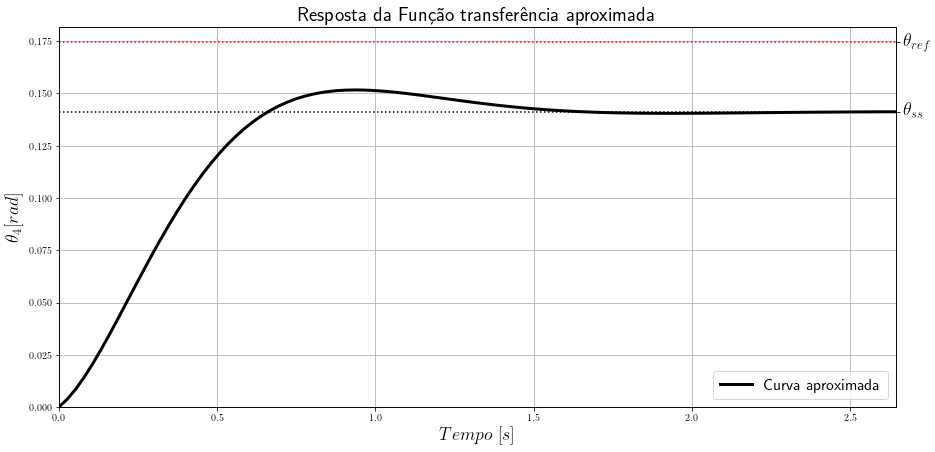

In [118]:
ref = np.deg2rad(10)    # change in u
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

y=ref*y1
x=t1

fig, ax1 = plt.subplots(figsize=(15, 7),sharey=True,sharex=True)
plt.xlabel(r"$Tempo\ [s]$", fontsize=18)
plt.ylabel(r"$\theta_{4} [rad]$", fontsize=18)
ax1.plot(x,y,'k',linewidth=3,label='Curva aproximada')
ax1.set_ylim(min(y),1.2*max(y))
ax1.grid(True)

y_ss = ref*(num[1]/den[2])
ax2=ax1.twinx()
ax2.plot([0,max(x)],[y_ss,y_ss],'k:')
ax2.plot([0,max(x)],[ref,ref],'r:')
ax2.set_ylim(min(y),1.2*max(y))
ax2.set_yticks([ref,y_ss])
ax2.set_yticklabels([r"$\theta_{ref}$",r"$\theta_{ss}$"], fontsize=18)

plt.xlim([0,max(x)])
ax1.legend(loc='lower right', fontsize=16)
plt.title("Resposta da Função transferência aproximada", fontsize=20,color='black')
plt.show()


<h2> Experimento B </h2>


\begin{equation}
\ddot{\theta}_2 = \frac{l_2 (F_1+F_2) - f_{s_2}\dot{\theta}_2}{\bar{I}_2}
\label{eq:movimentotheta2}
\end{equation}

\begin{equation}
    G_2(s)=\frac{\Theta_2(s)}{F(s)} = \frac{2l_2}{s(\bar{I}_2+f_{s_2})}
\end{equation}

In [101]:
Eq[1] = l2*(f1+f2)-fs2*diff(theta2,t)-diff(diff(theta2,t),t)*I2;
Eq[1]

-I_2*theta2'' - fs_2*theta2' + l_2*(F_1 + F_2)

In [102]:
simpl={f1:f,f2:f}
Eq[1]=Eq[1].subs(simpl)
Eq[1]

-I_2*theta2'' - fs_2*theta2' + 2*l_2*F

In [103]:
transformada=L(Eq[1])
Laplace={L(f):F,L((diff(diff(theta2,t),t))):(s*s*Theta2),L(diff(theta2,t)):(s*Theta2),L(theta2):Theta2}

In [104]:
transformada=transformada.subs(Laplace)
transformada

-I_2*s**2*\Theta_2(s) - fs_2*s*\Theta_2(s) + 2*l_2*F(s)

In [105]:
G2=transformada.coeff(F)/(-1*transformada.coeff(Theta2))
G2

2*l_2/(I_2*s**2 + fs_2*s)

\begin{equation}
    H_2(s)=\frac{\Theta_2(s)}{R(s)}=\frac{K_p G_2(s)}{1+K_p G_2(s)} =
    \frac{2K_pl_2}{s^2 \bar{I}_2+s f_{s_2}+2 K_p l_2}
    \label{eq:h2s}
\end{equation}

Função $H(s)$ nominal vale:

\begin{equation}
    H(s)= \frac{K \omega^2_n}{s^2 + 2 \xi \omega_n s+ \omega^2_n}\label{eq:padrao}
\end{equation}

Comparando a função nominal com a função transferência do ensaio tem-se:

\begin{equation}
\begin{cases}
    \omega^2_n=\frac{2K_p l_2}{\bar{I}_2}\\
    2 \xi \omega_n=\frac{f_{s_2}}{\bar{I}_2}\\
    K \omega^2_n=\frac{2K_p l_2}{\bar{I}_2}
\end{cases}
\end{equation}

In [106]:
H=(K*wn*wn)/(s*s+2*xi*wn*s+wn*wn)
H

K*omega_n**2/(omega_n**2 + 2*omega_n*s*xi + s**2)

In [107]:
H2=(Kp*G2)/(1+Kp*G2)
H2=H2.simplify()
H2

2*K_p*l_2/(I_2*s**2 + 2*K_p*l_2 + fs_2*s)

In [108]:
H2teorico=H2.subs(valores_den).subs(valores_den).subs(valores_m).subs(valores_Ix).subs(valores_Iy).subs(valores_Iz).subs(valores_l).subs(valores_lg).subs(valor_g).subs(valor_b)
H2teorico

1.19*K_p/(1.19*K_p + fs_2*s + 0.60760882809*s**2)

<h2> Valores obtidos experimentalmente</h2>

Método analítico

\begin{align}
K&=1.1645
&\xi&=0.3557
&\omega_n&=3.6111
\end{align}

Método usando algoritmo genético

\begin{align}
K&=1.3041
&\xi&=0.1832
&\omega_n&=2.9256
\end{align}

In [109]:
#valores_exp={K:1.1645,xi:0.3557,wn:3.6111}
valores_exp={K:1.3041,xi:0.1832,wn:2.9256}
Hexp=H.subs(valores_exp)
Hexp

11.161968422976/(s**2 + 1.07193984*s + 8.55913536)

In [110]:
# Coletando os coeficientes
num, den = fraction(Hexp)
num=Poly(num,s)
den=Poly(den,s)

num=num.all_coeffs()
den=den.all_coeffs()

#list to array
num = np.asarray(num, dtype=np.float32)
den = np.asarray(den, dtype=np.float32)

#truncando valores até a quarta casa decimal
num=(num).round(decimals=4)
den=(den).round(decimals=4)

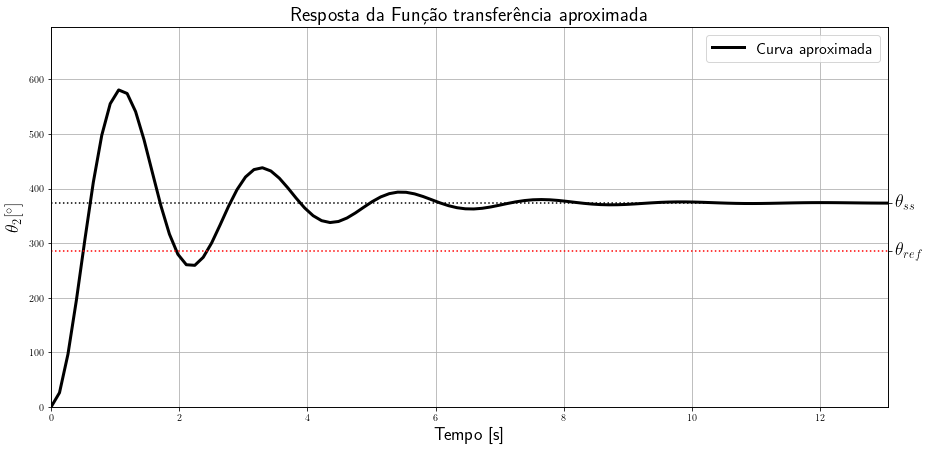

In [112]:
ref = np.rad2deg(5.0)    
sys2 = signal.TransferFunction(num,den)
t2,y2 = signal.step(sys2)

y=ref*y2
x=t2

fig, ax1 = plt.subplots(figsize=(15, 7),sharey=True,sharex=True)
plt.xlabel('Tempo [s]', fontsize=18)
plt.ylabel(r"$\theta_{2} [rad]$", fontsize=18)
ax1.plot(x,y,'k',linewidth=3,label='Curva aproximada')
ax1.set_ylim(min(y),max(y)*1.2)
ax1.grid(True)

y_ss = ref*(num/den[2])
ax2=ax1.twinx()
ax2.plot([0,max(x)],[y_ss,y_ss],'k:')
ax2.plot([0,max(x)],[ref,ref],'r:')
ax2.set_ylim(min(y),max(y)*1.2)
ax2.set_yticks([ref,y_ss])
ax2.set_yticklabels([r"$\theta_{ref}$",r"$\theta_{ss}$"], fontsize=18)

plt.xlim([0,max(x)])
ax1.legend(loc='best', fontsize=16)
plt.title("Resposta da Função transferência aproximada", fontsize=20,color='black')
plt.show()